<a href="https://colab.research.google.com/github/Pasz93/MachineLearning/blob/main/Risco_Mercado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  8 of 8 completed


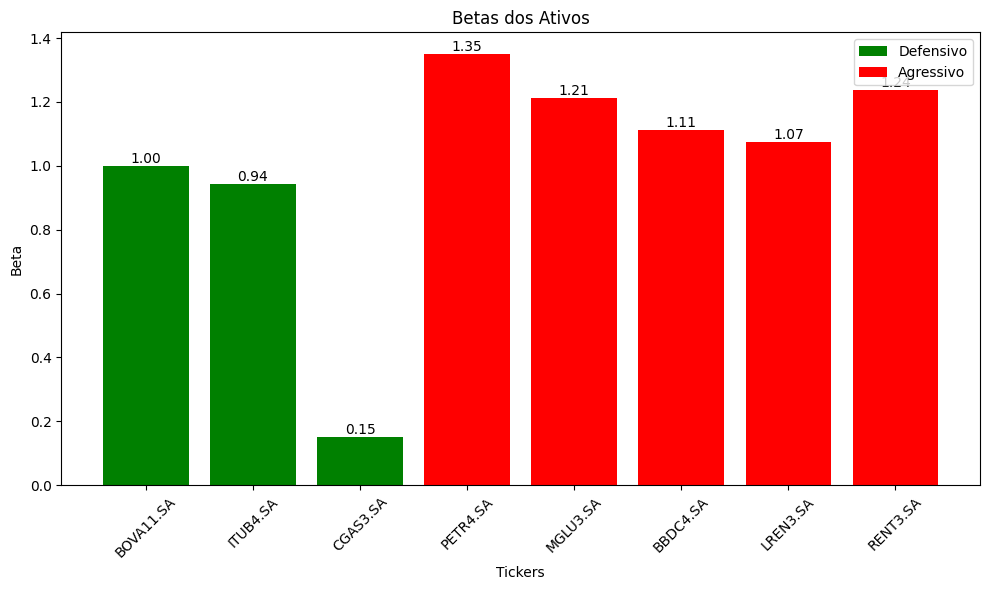

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Definição dos tickers
tickers = ['PETR4.SA', 'BOVA11.SA', 'MGLU3.SA', 'BBDC4.SA', 'LREN3.SA',
           'RENT3.SA', 'ITUB4.SA', 'CGAS3.SA']

# Obtendo dados históricos
data = yf.download(tickers, start="2020-01-01", end="2022-01-01")['Adj Close']

# Calculando os retornos diários
returns = data.pct_change().dropna()

# Calculando o beta para cada ativo em relação ao mercado (BOVA11)
market_returns = returns['BOVA11.SA']
betas = {}
for ticker in tickers:
    asset_returns = returns[ticker]
    cov = asset_returns.cov(market_returns)
    market_var = market_returns.var()
    beta = cov / market_var
    betas[ticker] = beta

# Separando os betas por tipo (defensivo ou agressivo)
defensivos = {ticker: beta for ticker, beta in betas.items() if beta < 1}
agressivos = {ticker: beta for ticker, beta in betas.items() if beta > 1}

# Criando o gráfico de colunas
plt.figure(figsize=(10, 6))
plt.bar(defensivos.keys(), defensivos.values(), color='green', label='Defensivo')
plt.bar(agressivos.keys(), agressivos.values(), color='red', label='Agressivo')
plt.xlabel('Tickers')
plt.ylabel('Beta')
plt.title('Betas dos Ativos')
plt.legend()
plt.xticks(rotation=45)
for ticker, beta in betas.items():
    plt.text(ticker, beta, f'{beta:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()
